<a href="https://colab.research.google.com/github/zanuarts/dicoding-ml-submission/blob/master/submission_dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dicoding Submission

---
##Preparation


In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

print(tf.__version__)

2.2.0


##Get Dataset

In [4]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rock_paper_scissors.zip

--2020-06-07 13:25:50--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock_paper_scissors.zip’

/tmp/rock_paper_sci 100%[===================>] 307.92M  8.58MB/s    in 43s     

2020-06-07 13:26:34 (7.18 MB/s) - ‘/tmp/rock_paper_scissors.zip’ saved [322873683/322873683]



##Extract Dataset

In [0]:
import zipfile,os
local_zip = '/tmp/rock_paper_scissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

##Split dataset

In [0]:
mypath = '/tmp/rockpaperscissors/'

In [0]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [0]:
import pandas as pd

In [9]:
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
                    1
paper            1424
rock             1452
rps-cv-images       1
scissors         1500
dtype: int64

In [10]:
df.head()

,path,file_name,tag
0,/tmp/rockpaperscissors/README_rpc-cv-images.txt,README_rpc-cv-images.txt,
1,/tmp/rockpaperscissors/rps-cv-images/README_rp...,README_rpc-cv-images.txt,rps-cv-images
2,/tmp/rockpaperscissors/rps-cv-images/rock/EQDf...,EQDfrFWZluld6aKP.png,rock
3,/tmp/rockpaperscissors/rps-cv-images/rock/qiys...,qiysAN26ClLYOZfG.png,rock
4,/tmp/rockpaperscissors/rps-cv-images/rock/UCZq...,UCZq5Q5ovMiGJLwX.png,rock


##Train test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X= df['path']
y= df['tag']

In [0]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=300)

In [0]:
df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation-set'})

df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train-set'})



In [15]:
print('train size', len(df_tr))
print('val size', len(df_val))


train size 3502
val size 876


In [16]:
df_all = df_tr.append([df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

df_all.sample(3)


set             tag          
train-set                           1
                paper            1129
                rock             1160
                rps-cv-images       1
                scissors         1211
validation-set  paper             295
                rock              292
                scissors          289
dtype: int64 




,path,tag,set
68,/tmp/rockpaperscissors/rps-cv-images/paper/Qxx...,paper,train-set
1203,/tmp/rockpaperscissors/paper/4IwJ2iL6pFz5ARWA.png,paper,train-set
2637,/tmp/rockpaperscissors/rps-cv-images/rock/Wn0j...,rock,train-set


##Move dataset

In [0]:
!rm -rf /tmp/dataset/

In [0]:
import shutil
from tqdm.notebook import tqdm as tq

In [0]:
datasource_path = "/tmp/rockpaperscissors/"
dataset_path = "/tmp/dataset/"

In [20]:
for index, row in tq(df_all.iterrows()):
    
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))

    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

##Image Augmentation

In [0]:
!rm -rf /tmp/dataset/train-set/README_rpc-cv-images.txt
!rm -rf /tmp/dataset/train-set/rps-cv-images

In [0]:
base_dir = '/tmp/dataset/'
train_dir = os.path.join(base_dir,'train-set')
validation_dir = os.path.join(base_dir,'validation-set')

In [23]:
os.listdir(train_dir)

['rock', 'scissors', 'paper']

In [24]:
os.listdir(validation_dir)

['rock', 'scissors', 'paper']

In [0]:
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [27]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(
    rescale = 1./255
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Found 2109 images belonging to 3 classes.
Found 797 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi mencapai 90%, train data diberhentikan !")
      self.model.stop_training = True

callbacks = myCallback()

In [29]:
model.compile(
    optimizer='rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch = 20,
    epochs = 25,
    validation_data = validation_generator,
    validation_steps = 3,
    verbose = 1,
    callbacks=[callbacks]
)


model.save("rockpaperscissor.h5")

Epoch 1/25
20/20 [==============================] - 38s 2s/step - loss: 1.1664 - accuracy: 0.3297 - val_loss: 1.0845 - val_accuracy: 0.3438
Epoch 2/25
20/20 [==============================] - 37s 2s/step - loss: 1.1044 - accuracy: 0.3564 - val_loss: 1.1665 - val_accuracy: 0.2188
Epoch 3/25
20/20 [==============================] - 41s 2s/step - loss: 1.1778 - accuracy: 0.3752 - val_loss: 1.0912 - val_accuracy: 0.3438
Epoch 4/25
20/20 [==============================] - 37s 2s/step - loss: 1.0735 - accuracy: 0.4078 - val_loss: 0.9322 - val_accuracy: 0.6250
Epoch 5/25
20/20 [==============================] - 37s 2s/step - loss: 1.0726 - accuracy: 0.4828 - val_loss: 0.8416 - val_accuracy: 0.7396
Epoch 6/25
20/20 [==============================] - 37s 2s/step - loss: 1.0816 - accuracy: 0.5031 - val_loss: 0.9836 - val_accuracy: 0.6042
Epoch 7/25
20/20 [==============================] - 37s 2s/step - loss: 0.9092 - accuracy: 0.5934 - val_loss: 0.8356 - val_accuracy: 0.6667
Epoch 8/25
20/20 [==

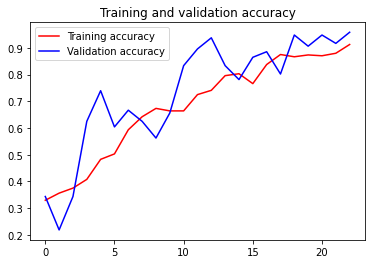

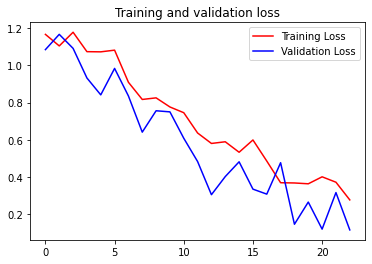

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Saving 1mnAKQCHEDbtjPX2.png to 1mnAKQCHEDbtjPX2.png
1mnAKQCHEDbtjPX2.png
[[0. 1. 0.]]
batu


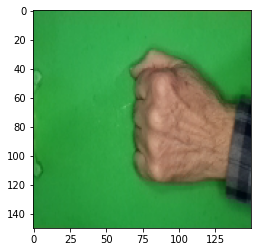

In [36]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  hasil = np.argmax(classes)
  print(fn)
  print(classes)
  if hasil == 0:
    print('kertas')
  elif hasil == 1:
    print('batu')
  elif hasil == 2:
    print('gunting')
  else:
    print('coba lagi')